In [1]:
from scipy import stats
import numpy as np
import CombinedFCToolBox as cfc
import matplotlib.pyplot as plt

### make a network model: adjusted Erdos-Renyi or adjusted Static Power Law

network with 200 nodes and 897 edges


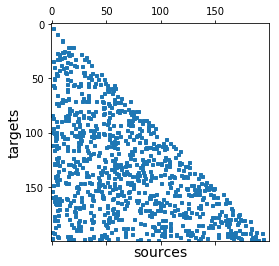

In [2]:
#the graphModel function requires installation: "conda install -c conda-forge python-igraph"
#https://igraph.org/python/

model = 'ErdosRenyi'
edgedensity = 900 #number of edges
nNodes = 200 #number of nodes

C = cfc.graphModel(model,edgedensity*2,nNodes)

#plot the network model in binary matrix form column(source) -> row(target), causal direction
real_nEdges = np.sum(C==1)
print(f'network with {nNodes} nodes and {real_nEdges} edges')
plt.spy(C,markersize=3)
plt.xlabel('sources',fontsize=14)
plt.ylabel('targets',fontsize=14)
plt.show()

### simulate data for a network, using the linear model X = WX + E
X dimension is [datapoints x nodes]

X dataset with 1200 datapoints and 200 nodes


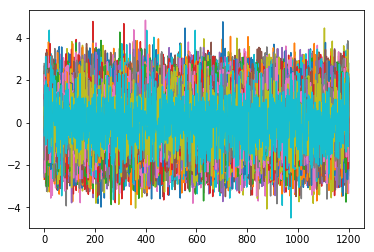

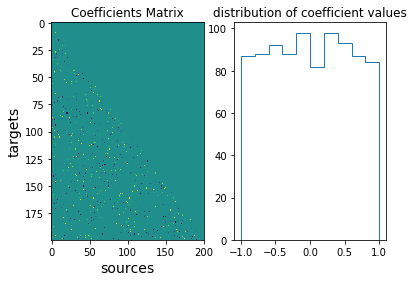

In [3]:
network = C #network model defined above
#Connectivity coefficients are sampled from a Normal(mean_coefficient,std_coeff)
min_coefficient = -1
max_coefficient = 1
number_datapoints = 1200

X, W = cfc.simulateData.pseudoEmpiricalData(network, 
                                            min_coeff = min_coefficient, 
                                            max_coeff = max_coefficient, 
                                            nDatapoints=number_datapoints
                                            )

##an alternative is to use Gaussian data for error terms E, instead of the pseudo-empirical
#type_distribution = 'Gaussian'  #or "nonGaussian" for a Beta(1,5)
#X,W = cfc.simulateData.syntheticData(network, 
#                                   mean_coeff = mean_coefficient, 
#                                   std_coeff = std_coefficient, 
#                                   nDatapoints = number_datapoints,
#                                   distribution = type_distribution
#                                   )

#plot the simulated data
print(f'X dataset with {X.shape[0]} datapoints and {X.shape[1]} nodes')
plt.plot(X)
plt.show()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(W,aspect='auto')
ax1.set_title('Coefficients Matrix')
ax1.set_xlabel('sources',fontsize=14)
ax1.set_ylabel('targets',fontsize=14)
#plot the distribution of the simulated coefficients
ax2.hist(W[W!=0].flatten(),histtype='step')
ax2.set_title('distribution of coefficient values')
plt.show()

In [4]:
M = cfc.combinedFC(X,  
                   methodCondAsso = 'partialCorrelation',
                   methodParcorr='inverseCovariance',
                   alphaCondAsso = 0.01,
                   methodAsso = 'correlation',
                   alphaAsso = 0.01,
                   equivalenceTestAsso = False,
                   lower_bound = -0.2, 
                   upper_bound = +0.2
                   )

correlation 0.8311491348543333
SpearmanrResult(correlation=0.6680626451247149, pvalue=0.0)
precision 0.6282173498570067
recall 0.7346711259754738


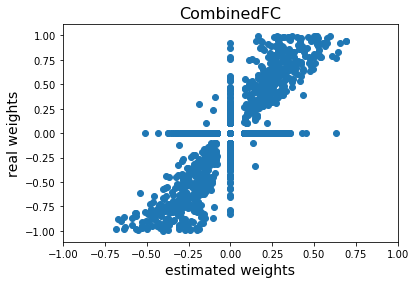

In [12]:
res = np.tril(M,k=-1).flatten()
#nor = cfc.fisherZTrans(res, 1200, Ho=0, condSetSize=real_nEdges-2)

model = np.tril(W,k=-1).flatten()

plt.scatter(res,model)
plt.xlabel('estimated weights',fontsize=14)
plt.ylabel('real weights',fontsize=14)
plt.title('CombinedFC',fontsize=16)
plt.xlim([-1,1])
#plt.plot([-1, 1], [-1, 1], 'red', linewidth=1)
print(f'correlation {np.corrcoef(res,model)[1,0]}')
print(stats.spearmanr(res,model,axis=0))
print(f'precision {cfc.precision(M,C)}')
print(f'recall {cfc.recall(M,C)}')

correlation 0.4906324724916667
SpearmanrResult(correlation=0.2927060998199182, pvalue=0.0)
precision 0.10122699386503067
recall 0.882943143812709


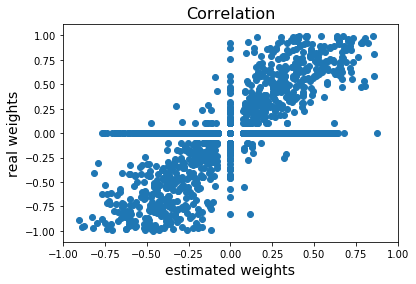

In [16]:
M2 = cfc.correlationSig(X,alpha=0.01,
                        lower_bound = -0.1, 
                        upper_bound = +0.1, 
                        equivalenceTest = False)


plt.scatter(np.tril(M2,k=-1).flatten(),np.tril(W,k=-1).flatten())
plt.xlim([-1,1])
plt.xlabel('estimated weights',fontsize=14)
plt.ylabel('real weights',fontsize=14)
plt.title('Correlation',fontsize=16)

print(f'correlation {np.corrcoef(np.tril(M2,k=-1).flatten(),model)[1,0]}')
print(stats.spearmanr(np.tril(M2,k=-1).flatten(),model,axis=0))
print(f'precision {cfc.precision(M2,C)}')
print(f'recall {cfc.recall(M2,C)}')

correlation 0.7347022389927649
SpearmanrResult(correlation=0.5259156835895851, pvalue=0.0)
precision 0.3630769230769231
recall 0.7892976588628763


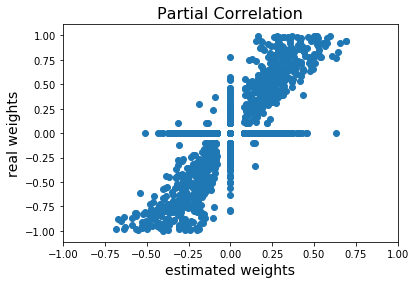

In [20]:
M3 = cfc.partialCorrelationSig(X, alpha = 0.01, method = 'inverseCovariance')


plt.scatter(np.tril(M3,k=-1).flatten(),np.tril(W,k=-1).flatten())
plt.xlabel('estimated weights',fontsize=14)
plt.ylabel('real weights',fontsize=14)
plt.title('Partial Correlation',fontsize=16)
plt.xlim([-1,1])

print(f'correlation {np.corrcoef(np.tril(M3,k=-1).flatten(),model)[1,0]}')
print(stats.spearmanr(np.tril(M3,k=-1).flatten(),model,axis=0))
print(f'precision {cfc.precision(M3,C)}')
print(f'recall {cfc.recall(M3,C)}')